In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import math 
from google.colab import drive 
import os 
from mpl_toolkits.mplot3d import Axes3D

**Mount Drive**

In [2]:
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
%cd /content/drive/My\ Drive/

/content/drive/My Drive


In [4]:
os.chdir('/content/drive/My Drive/Colab Notebooks/Machine Learning/Regularization')

Before we start our computation we are just preporcessing the datasets.
 1. Normalizing the datasets
 2. Convert Non- Numerical data to integers
 3. slicing  the datasets with xdata and ydata
 4. we are loading the datasets

In [5]:
path ="Data"
wine=pd.read_csv(path+"/winequality-red.csv",sep=";")
print(wine.head(5))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [6]:
def remove_nullvalues(data):
    if(data.isnull().values.any()):
            data.dropna()
    return(data)
   
def replace_strings(data,name):
    for each in name:
        if (data[each].dtype != np.number and data[each].dtype!=np.int):
             uniquenames=np.unique(data[each])
             length=len(uniquenames)
             data[each]=data[each].replace(uniquenames,range(length))
    return data


def normalization(data):
    data=(data-np.mean(data))/np.std(data)
    return data


def process(dataset):
    dataset=remove_nullvalues(dataset)
    dataset=replace_strings(dataset,list(dataset))
    dataset=normalization(dataset)
    #dataset.insert(loc=0,column='Beta',value=1)
    Train=dataset.sample(frac=0.8)
    Test=dataset.drop(Train.index)    
    return Train,Test

 Hyperparameters  Usinng the Sum of Sqaured Errors function.

For this we need the following functions:
1. Sqaured loss and RMSE 
2. Shuffle function to shuffle the datasets 
3. batch function 
4. Mini_ BAtch Grdient Descent Function 

In [7]:
def batches(X,Y,B):
    for i in np.arange(0, X.shape[0], B):
        yield (X[i:i + B], Y[i:i + B])

def rss_loss(x,y,b):
    s = y.size
    Y = np.dot(x, b)
    error = y -Y
    l=(1.0/(2*s)) * np.dot(error.T, error)
    return l


def scatter(dataset):
    data=dataset.sample(len(dataset))
    n=len(list(data))
    y_data=data.iloc[:,n-1]
    x_data=data.iloc[:,0:n-1]
    x_data=np.array(x_data)
    y_data=np.array(y_data)
    return x_data,y_data

def rmse(Y,y):
    rms=np.sqrt(np.mean(np.square(Y-y)))
    return rms

# MINI BATCH GRADIENT DESCENT
1. Mini-batch gradient descent is a variation of the gradient descent algorithm that splits the training dataset into small batches that are used to calculate model error and update model coefficients.
2. Implementations may choose to sum the gradient over the mini-batch or take the average of the gradient which further reduces the variance of the gradient.
3. Mini-batch gradient descent seeks to find a balance between the robustness of stochastic gradient descent and the efficiency of batch gradient descent. It is the most common implementation of gradient descent used in the field of deep learning.
4. For Mini batch we use a Batch size that will iterate over the dataset 

In [8]:
def mini_BGD(data_train,data_test,beta,alpha,b_size,lam,imax,epsilon):
    rmse_test=[]
    rmse_train=[]
    count=0
    y=[]
    for i in range(imax):
        epoch_loss=[]
        x_test,y_test=scatter(data_test)
        x_train,y_train=scatter(data_train)
        Y=np.dot(x_train,beta)
        l_value=rmse(y_train,Y)
        for (xb,yb) in batches(x_train,y_train,b_size):
            YB=np.dot(xb,beta)
            error=yb-YB
            l2=lam*(beta)
            grad=-2*(np.dot(xb.T,error)-(l2))
            beta=beta-alpha*grad
            loss=rss_loss(xb,yb,beta)
            epoch_loss=np.append(epoch_loss,loss)
        Ytrain=np.dot(x_train,beta)
        Ytrain=np.mean(y_train)+Ytrain
        rmseTrain=rmse(Ytrain,y_train)
        rmse_train=np.append(rmse_train,rmseTrain)
        Ytest=np.dot(x_test,beta)
        Ytest=np.mean(y_test)+Ytest
        rmseTest=rmse(Ytest,y_test)
        count-=1
        y=np.append(y,count)
        rmse_test=np.append(rmse_test,rmseTest)
        if(l_value-rmseTrain<epsilon):
                return beta,rmse_train,rmse_test,y 
    return beta,rmse_train,rmse_test,y 

In [9]:
wine_train,wine_test=process(wine)
wine_beta=np.zeros(len(wine_train.T)-1)
batch_size=50
alphas=[0.0001,0.00001,0.000001]
regs=[0.1,0.5,0.000001]


**Plotting the Function**

<Figure size 432x288 with 0 Axes>

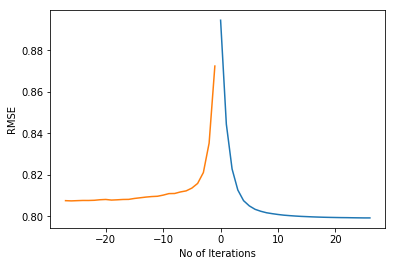

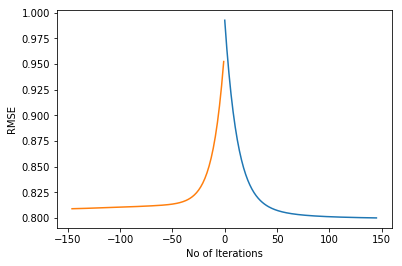

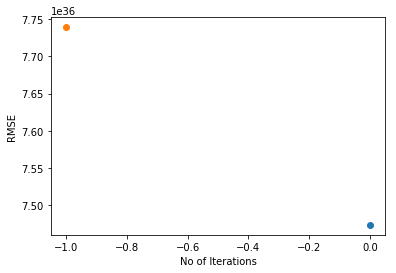

<Figure size 432x288 with 0 Axes>

In [10]:
beta1,rmse_wineTrain,rmse_wineTest,yaxis=mini_BGD(wine_train,wine_test,wine_beta,0.0001,batch_size,0.5,1000,0.000000000005)
plt.plot(range(len(rmse_wineTrain)),rmse_wineTrain,label="RMSE_Train")
plt.plot(yaxis,rmse_wineTest,label="RMSE_Test")
plt.xlabel("No of Iterations")
plt.ylabel("RMSE")

plt.figure()

beta1,rmse_wineTrain,rmse_wineTest,yaxis=mini_BGD(wine_train,wine_test,wine_beta,0.00001,batch_size,0.5,1000,0.000000000005)
plt.plot(range(len(rmse_wineTrain)),rmse_wineTrain,label="RMSE_Train")
plt.plot(yaxis,rmse_wineTest,label="RMSE_Test")
plt.xlabel("No of Iterations")
plt.ylabel("RMSE")
plt.figure()

beta1,rmse_wineTrain,rmse_wineTest,yaxis=mini_BGD(wine_train,wine_test,wine_beta,0.1,batch_size,0.5,1000,0.000000000005)
plt.plot(range(len(rmse_wineTrain)),rmse_wineTrain,'o')
plt.xlabel("No of Iterations")
plt.ylabel("RMSE")
plt.plot(yaxis,rmse_wineTest,'o')
plt.figure()

From the above we see that using  large alpha  the convergence is slower  where as in the second graph the convergence is faster wiith smaller alpha vlaue  

#K folds Cross validation and Grid Search on Hyperparameters
  **K Fold Cross Validation**
1. In K Folds cross validation, the data is divided into k subsets. Now the holdout method is repeated k times, such that each time, one of the k subsets is used as the test set/ validation set and the other k-1 subsets are put together to form a training set. 
2. The error estimation is averaged over all k trials to get total effectiveness of our model. As can be seen, every data point gets to be in a validation set exactly once, and gets to be in a training set k-1 times. 
3. This significantly reduces bias as we are using most of the data for fitting, and also significantly reduces variance as most of the data is also being used in validation set. 
4. Interchanging the training and test sets also adds to the effectiveness of this method. As a general rule and empirical evidence, K = 5 or 10 is generally preferred, but nothing’s fixed and it can take any value.

**Grid Search**
1. Grid Search means you have a set of models (which differ from each other in their parameter values, which lie on a grid). What you do is you then train each of the models and evaluate it using cross-validation. You then select the one that performed best.
2. Here we are using both the trainig data and the test for the grid search and qwe select the best dataset out of it  for our use.

In [11]:
# We not only see the training data or test data we using k  that is the number of folds on the training data  and see which is the best and choose that one after iterating over a loop.
# also in our function we are returning the RMSe for boht the test and train data.
# pop out one value in the iteration and concatinating  to the training dataset again.

def kfold_crossvalidation(data,k,alpha,beta,size,imax,reg):
    k_fold=np.array_split(data,k)
    rmse_kfold=[]
    count=0
    for kfold in k_fold:
        train=list(k_fold)
        train.pop(count)
        train=pd.concat(train)
        test_valid=kfold
        beta_new,rmse_train,rmse_valid,c=mini_BGD(train,test_valid,beta,alpha,size,reg,imax,0.000000000005)
        count+=1
        rmse_kfold=np.append(rmse_kfold,np.mean(rmse_valid))
    rmse_fold=np.average(rmse_kfold)
    return rmse_fold
 
# In this function we are calling the kFold croos val function. We are just taking an input and for each of the lamda and aplpha we arwe iterating over.
# we are trying to compare the old value with the new value and then return the RMSE for both test and train data.    
def gridsearch(data,kfold,beta,alphas,imax,regs,b_size):
    gradient_rmse=[]
    final_rmse=[]
    old_val=0
    new_val=0
    for alpha in alphas:
        for reg in regs:
            cross_val=kfold_crossvalidation(data,kfold,alpha,beta,b_size,imax,reg)
            gradient_rmse=np.append(gradient_rmse,cross_val)
            old_val=new_val
            new_val=np.min(gradient_rmse)
            if(new_val<old_val):
                final_rmse=np.append(final_rmse,(new_val,alpha,reg))
    return gradient_rmse,final_rmse


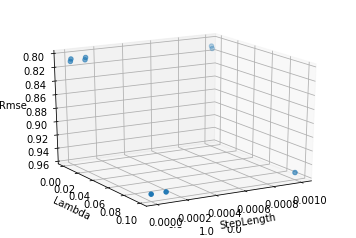

<Figure size 432x288 with 0 Axes>

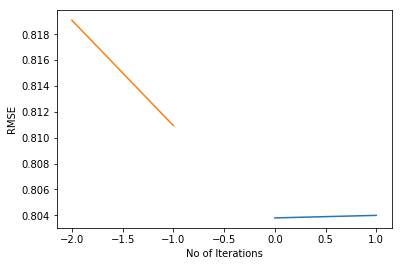

<Figure size 432x288 with 0 Axes>

In [13]:
# plot the grpah on 3d axis both the x,y and z axis respectively.
# we showing the step length the lamda and rmse values respectively
alpha=[0.001,0.0001,0.0000001]
reg=[0.001,0.0001,0.1]
plot_val,best=gridsearch(wine_train,5,wine_beta,alpha,1000,reg,batch_size)
x,y=np.meshgrid(alpha,reg)
z=np.array(plot_val)
fig=plt.figure()

ax=fig.gca(projection='3d')
ax=fig.add_subplot(111,projection='3d')
ax.scatter(x,y,z)
ax.set_xlabel("StepLength")
ax.set_ylabel("Lambda")
ax.set_zlabel("Rmse")
ax.view_init(200)
plt.show()
best_alpha=best[1]
best_reg=best[2]
best_beta1,best_rmse_wineTrain,best_rmse_wineTest,yaxis=mini_BGD(wine_train,wine_test,wine_beta,best_alpha,batch_size,best_reg,500,0.000000000005)
plt.plot(range(len(best_rmse_wineTrain)),best_rmse_wineTrain)
plt.plot(yaxis,best_rmse_wineTest)
plt.xlabel("No of Iterations")
plt.ylabel("RMSE")
plt.figure()

#Newton Method Implementation 

1. Newton’s Method, and how it can be used to solve Logistic Regression. Logistic Regression introduces the concept of the Log-Likelihood of the Bernoulli distribution, and covers a neat transformation called the sigmoid function.
2. We also introduce The Hessian, a square matrix of second-order partial derivatives, and how it is used in conjunction with the Gradient to implement Newton’s Method:
 Define a Logistic sigmoid Function.
 Define a probability function for the predictions.
 Define the newton with the follwing opetrations:
  1. $X.T$
  2. $X.T*(y-p)$ where is p the refers to the sigmoid function value = Gradoient 
  3. Calcualte the diagonal $W = diag(p*(1=p))$
  4. Multiply the diagonal: $W *X.T$
  5. Find the inverse of :$(X.T *  W.X)^{-1}$ = Hesian 
  6. update the beta = beta - alpha * $(Hessian)^{-1}$ * gradient 
  7. return the beta values 

In [14]:
# this gives the probabiliy of the sigmopid function and used for prediction of the test data.
def prediction(beta,xdata):
    p=logistic_function(beta,xdata)
    n=len(p)
    for i in range(n):
        if p[i]<=0.5:
            p[i]=0
        else:
            p[i]=1

    return p

def logistic_function(beta,x):
    xb=np.dot(x,beta)
    p=1/(1+np.exp(-xb))
    return p

# newton method use the logistic regression do iterations on the data set.
# here we are doling basic matrix calculations to get the gradient  the hessian and the updated beta values.
# using the probavility function to get the resulted predictions and alastly we are finding the RSME for both tes and train data.

def Newton(train,beta,alpha,imax,epsilon,reg,test):
    rmsetrain=[]
    rmsetest=[]
    count=0
    c=[]
    for i in range(imax):
       x,y=scatter(train)
       xtest,ytest=scatter(test)
       for xb,yb in batches(x,y,50):
           p=logistic_function(beta,xb)
           yp=yb-p
           xtp=np.dot(xb.T,yp)
           diag=p*(1-p)
           w=np.diag(diag)
           xtw=np.dot(xb.T,w)
           xtwx=np.dot(xtw,xb)
           xtwxI=np.linalg.inv(xtwx)
           grad=np.dot(xtwxI,xtp)
           beta=beta-(alpha*grad+(reg*beta))
        
       predict=prediction(beta,x)
       predict_test=prediction(beta,xtest)
       rmse_train=rmse(predict,y)
       rmse_test=rmse(predict_test,ytest)
       rmsetrain=np.append(rmsetrain,rmse_train)
       rmsetest=np.append(rmsetest,rmse_test)
       count-=1
       c=np.append(c,count)
    return rmsetrain,rmsetest,c

# Plotting  the datset the graphs respectively 
In the below graphs we see the following :
1. when the alpha and lamda value are large the RMSE for the training is smaller in the graphs , when compared with small alpha and lamda values.
2. In the cas of the RMSE test we have a change when alpha and lamda values are small the RMSE value is small and when the they incerease even the RMSE tends to increase.

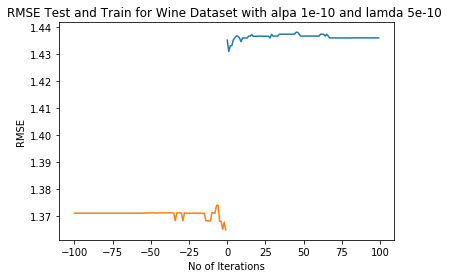

<Figure size 432x288 with 0 Axes>

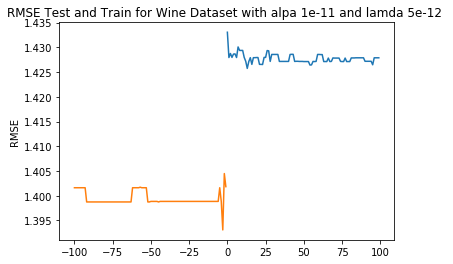

<Figure size 432x288 with 0 Axes>

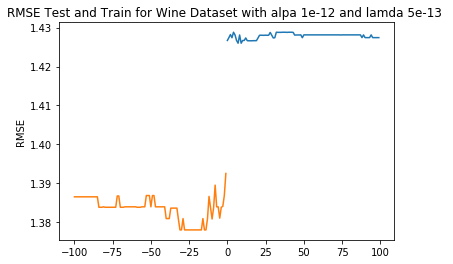

<Figure size 432x288 with 0 Axes>

In [15]:
wine_train,wine_test=process(wine)
Beta1=np.zeros(len(wine_train.T)-1)
eps=5e-9
X,X1,Y=Newton(wine_train,Beta1,1e-10,100,eps,5e-10,wine_test)
plt.plot(range(len(X)),X)
plt.plot(Y,X1)
plt.title("RMSE Test and Train for Wine Dataset with alpa 1e-10 and lamda 5e-10 ")
plt.ylabel("RMSE")
plt.xlabel("No of Iterations")
plt.figure()
plt.show()

plt.title("RMSE Test and Train for Wine Dataset with alpa 1e-11 and lamda 5e-12 ")
plt.ylabel("RMSE")
wine_train,wine_test=process(wine)
Beta1=np.zeros(len(wine_train.T)-1)
eps=5e-11
X,X1,Y=Newton(wine_train,Beta1,1e-11,100,eps,5e-12,wine_test)
plt.plot(range(len(X)),X)
plt.plot(Y,X1)
plt.figure()
plt.show()

plt.title("RMSE Test and Train for Wine Dataset with alpa 1e-12 and lamda 5e-13 ")
plt.ylabel("RMSE")
wine_train,wine_test=process(wine)
Beta1=np.zeros(len(wine_train.T)-1)
eps=5e-13
X,X1,Y=Newton(wine_train,Beta1,1e-12,100,eps,5e-13,wine_test)
plt.plot(range(len(X)),X)
plt.plot(Y,X1)
plt.figure()
plt.show()